## Participants

* Samantha
* Rachelle
* Andrew


## Résumé des observations

Ce jeu de données comprend 3 colonnes et 10 143 819 lignes

# <div style='color:white;background: #005792;text-align: center;padding: 15px 0'>Recommandations - Visualisation de la source de données Title crew</div>

### Installation des librairies

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly-express
# !pip install plotly

### Importation des librairies

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re

### Chargement des fichiers

In [4]:
source_dir= '/home/dstrec/dstrec/010_data/000_source/imdb_datasets'
name_file= 'title.crew.tsv'
file_path= f"{source_dir}/{name_file}"

df= pd.read_csv(file_path, sep='\t', na_values='\\N', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10143819 entries, 0 to 10143818
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 232.2+ MB


### Visualisation de la part de non renseigné de chaque variable du fichier

DataVisualisation de la variable  tconst
Cette variable a  10143819  valeurs distintes
Cette variable ne contient pas de données non renseignées 

DataVisualisation de la variable  directors
Cette variable a  901490  valeurs distintes


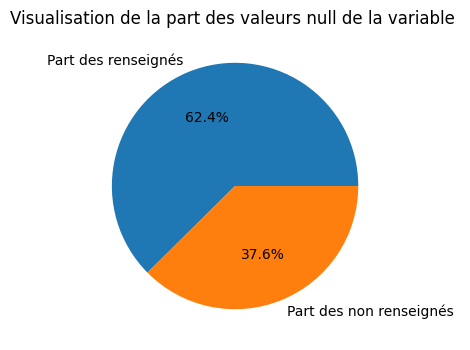

DataVisualisation de la variable  writers
Cette variable a  1343003  valeurs distintes


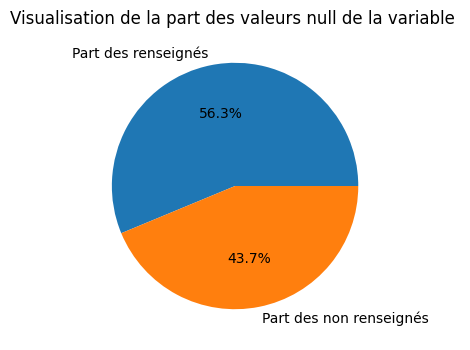

In [4]:
#Visualisation de la part de non renseigné de chaque variable du fichier
########################################################################""
for i in df.columns.values:
    print("DataVisualisation de la variable ",i)
    print("Cette variable a ",len(df[i].unique())," valeurs distintes")    
    if df[i].isna().sum()>0:
       res= df[i].isnull().value_counts(normalize = "true")
       plt.figure(figsize = (4, 4))
       plt.pie(res, labels = ['Part des renseignés', 'Part des non renseignés'], autopct='%1.1f%%')
       plt.title("Visualisation de la part des valeurs null de la variable ")
       plt.show()
    else:
        print("Cette variable ne contient pas de données non renseignées","\n")

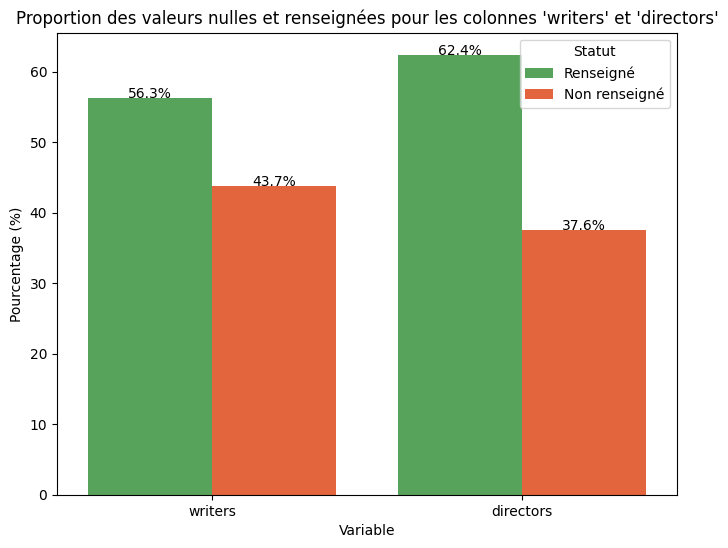

In [9]:
columns_to_plot = ['writers', 'directors']

# Préparation des données pour les deux colonnes
data = []
for col in columns_to_plot:
    total_count = len(df[col])
    null_count = df[col].isna().sum() / total_count * 100
    non_null_count = df[col].notna().sum() / total_count * 100
    data.append([col, 'Renseigné', non_null_count])
    data.append([col, 'Non renseigné', null_count])

# Transformation en DataFrame
plot_df = pd.DataFrame(data, columns=['Variable', 'Statut', 'Pourcentage'])

# Création du diagramme en barres groupées
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Variable', y='Pourcentage', hue='Statut', data=plot_df, palette=["#4CAF50", "#FF5722"])

# Ajout des pourcentages sur les barres, seulement si le pourcentage est significatif
for p in ax.patches:
    height = p.get_height()
    if height > 0.5:  # Seulement annoter si le pourcentage est supérieur à 0.5%
        ax.annotate(f'{height:.1f}%', 
                    xy=(p.get_x() + p.get_width() / 2, height), 
                    xytext=(0, 3),
                    textcoords="offset points", 
                    ha='center', va='center')

plt.ylabel('Pourcentage (%)')
plt.title("Proportion des valeurs nulles et renseignées pour les colonnes 'writers' et 'directors'")
plt.show()


### Autres visualisations

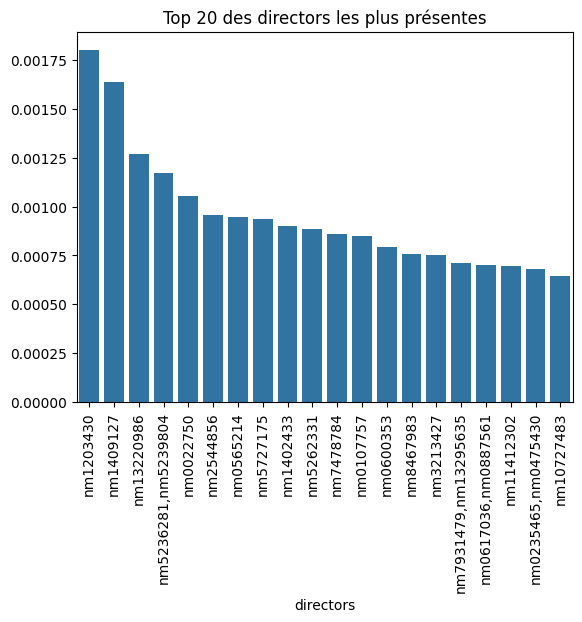

In [5]:
#Directors les plus présentes
###############################
ax = sns.barplot(y=df['directors'].value_counts(normalize=True).head(20).values,
            x=df['directors'].value_counts(normalize=True).head(20).index)
ax.tick_params(axis='x', rotation=90)
plt.title("Top 20 des directors les plus présentes")
plt.show()

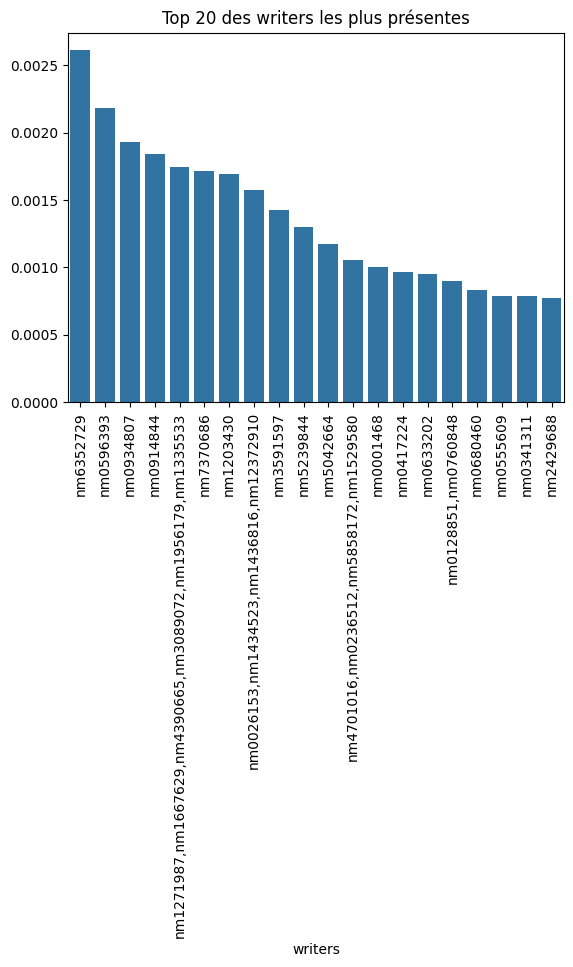

In [6]:
#Writers les plus présentes
###############################
ax = sns.barplot(y=df['writers'].value_counts(normalize=True).head(20).values,
            x=df['writers'].value_counts(normalize=True).head(20).index)
ax.tick_params(axis='x', rotation=90)
plt.title("Top 20 des writers les plus présentes")
plt.show()